In [1]:
# Install the necessary libraries for implementing DL: after launching this cell, restart kernel
!pip3 install --user keras scikit-learn pandas opencv-python

     |████████████████████████████████| 378kB 8.1MB/s eta 0:00:01
     |████████████████████████████████| 7.1MB 20.5MB/s eta 0:00:01
     |████████████████████████████████| 10.1MB 88.7MB/s eta 0:00:01
     |████████████████████████████████| 28.2MB 37.5MB/s eta 0:00:01
     |████████████████████████████████| 276kB 36.2MB/s eta 0:00:01
     |████████████████████████████████| 296kB 61.7MB/s eta 0:00:01
     |████████████████████████████████| 512kB 35.0MB/s eta 0:00:01
Failed to build pyyaml
    Running setup.py install for pyyaml ... done
You should consider upgrading via the 'pip install --upgrade pip' command.


In [1]:
# import the necessary packages

from keras.preprocessing.image import ImageDataGenerator
from keras.applications import InceptionV3
from keras.layers import Input, AveragePooling2D, GlobalAveragePooling2D, Dense, Flatten, Dropout
from keras.models import Model, Sequential
from keras.optimizers import Adam, SGD, RMSprop, Adagrad
from keras import regularizers
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import np_utils
#import cv2

Using TensorFlow backend.


In [2]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.3
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [3]:
# Load data: images and labels

data = []
labels = []

In [4]:
data = np.array(np.load("../data/all_images_kimeye.npy"))
labels = np.array(np.load("../data/all_labels_kimeye.npy"))
labels = labels.astype(int)

In [5]:
"""
data2 = np.array(np.load("../data/all_images_acrima.npy"))
labels2 = np.array(np.load("../data/all_labels_acrima.npy"))
labels2 = labels2.astype(int)
"""

'\ndata2 = np.array(np.load("../data/all_images_acrima.npy"))\nlabels2 = np.array(np.load("../data/all_labels_acrima.npy"))\nlabels2 = labels2.astype(int)\n'

In [6]:
"""
data = np.concatenate((data1, data2), axis=0)
labels = np.concatenate((labels1, labels2), axis=0)
"""
print(data.shape)
print(labels[0])

(1544, 224, 224, 3)
0


In [5]:
# shuffle the whole dataset

shuffle = list(zip(data, labels))
np.random.seed(42)
np.random.shuffle(shuffle)
data = np.array([shuffle[i][0] for i in range(len(shuffle))])
labels = np.array([shuffle[i][1] for i in range(len(shuffle))])
del shuffle


In [6]:
# perform one-hot encoding on the labels
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = np_utils.to_categorical(labels)

data = np.array(data)
print(labels)
#labels = np.array(labels)

[[0. 1.]
 [1. 0.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [9]:
"""
plt.imshow(data[254])
plt.show()
print(labels[254])

plt.imshow(data[1])
plt.show()
print(labels[1])
"""

'\nplt.imshow(data[254])\nplt.show()\nprint(labels[254])\n\nplt.imshow(data[1])\nplt.show()\nprint(labels[1])\n'

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


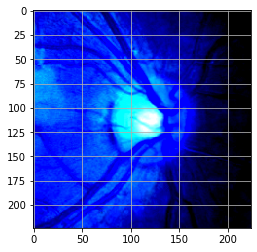

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[1. 0.]


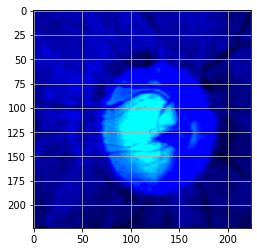

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[0. 1.]


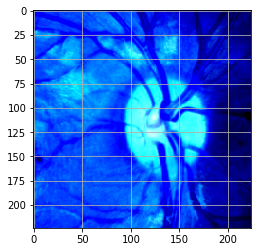

[1. 0.]


In [7]:
# partition the data into training and testing splits using 75% of
# the data for training and the remaining 25% for testing
(trainX, testX, trainY, testY) = train_test_split(data, labels, 
	test_size=0.25, random_state=42)

plt.grid(None)

plt.imshow(trainX[10])
plt.show()
print(trainY[10])

plt.grid(None)

plt.imshow(testX[276])
plt.show()
print(testY[276])

plt.grid(None)

plt.imshow(testX[208])
plt.show()
print(testY[208])

In [8]:
# initialize the training data augmentation object

trainAug = ImageDataGenerator(
	rotation_range=40,
	zoom_range=0.2,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.2,
	horizontal_flip=True,
	vertical_flip=True,
	fill_mode="nearest")

# initialize the validation/testing data augmentation object (which
# we'll be adding mean subtraction to)
valAug = ImageDataGenerator()

# define the ImageNet mean subtraction (in RGB order) and set the
# the mean subtraction value for each of the data augmentation
# objects
#mean = np.array([123.68, 116.779, 103.939], dtype="float32")
#trainAug.mean = mean
#valAug.mean = mean

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Labels: [array([1., 0.], dtype=float32), array([1., 0.], dtype=float32), array([1., 0.], dtype=float32), array([1., 0.], dtype=float32), array([1., 0.], dtype=float32), array([1., 0.], dtype=float32), array([1., 0.], dtype=float32), array([1., 0.], dtype=float32)]


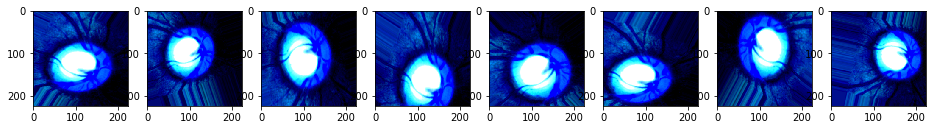

In [9]:
# visualize the different geometric transformations operated to the images

img_id = 600
cat_generator = trainAug.flow(trainX[img_id:img_id+1], 
 trainY[img_id:img_id+1], 
 batch_size=1) 
cat = [next(cat_generator) for i in range(0,8)] 
fig, ax = plt.subplots(1,8, figsize=(16, 6))

print('Labels:', [item[1][0] for item in cat]) 
l = [ax[i].imshow(cat[i][0][0]) for i in range(0,8)]

In [26]:
# load InceptionV3, ensuring the head FC layer sets are left off, while at
# the same time adjusting the size of the input image tensor to the
# network
baseModel = InceptionV3(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))

In [27]:
# show a summary of the base model
print("[INFO] summary for base model...")
print(baseModel.summary())

[INFO] summary for base model...
Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv2d_189 (Conv2D)             (None, 111, 111, 32) 864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_189 (BatchN (None, 111, 111, 32) 96          conv2d_189[0][0]                 
__________________________________________________________________________________________________
activation_189 (Activation)     (None, 111, 111, 32) 0           batch_normalization_189[0][0]    
______________________________________________________

In [28]:
# construct the head of the model that will be placed on top of the
# the base model

layer_index = -1
headModel = baseModel.layers[layer_index].output

headModel = GlobalAveragePooling2D()(headModel)

# let's add a fully-connected layer
hidden_units = 512
dropout_rate = 0.5

headModel = Dense(hidden_units, activation='relu')(headModel)
headModel = Dropout(dropout_rate)(headModel)
headModel = Dense(2, activation="softmax")(headModel)
 
# place the head FC model on top of the base model (this will become
# the actual model we will train)
model = Model(inputs=baseModel.input, outputs=headModel)

In [38]:
print(len(baseModel.layers))

311


In [29]:
# loop over all layers in the base model and freeze them so they will
# *not* be updated during the first training process
for layer in baseModel.layers:
   layer.trainable = False

In [14]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 111, 111, 32) 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 111, 111, 32) 0           batch_normalization_1[0][0]      
____________________________________________________________________________________________

In [47]:
callbacks =  [EarlyStopping(monitor='val_loss',  patience=20, verbose=1,  mode='auto'),
            ]

In [30]:
# compile our model (this needs to be done after setting our
# layers to being non-trainable)
print("[INFO] compiling model...")
#opt = Adam(lr=1e-4)
#opt = RMSprop(lr=1e-4)
lr = 1e-5
momentum = 0.9
decay=1e-6
opt = SGD(lr=lr, momentum=momentum, decay=decay)

model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])
opt_name, _ = str(opt)[18:].split(' ', 1)
print(opt_name)

[INFO] compiling model...
SGD


In [31]:
epochs = 100
batch_size = 8

# train the head of the network for a few epochs (all other layers
# are frozen) -- this will allow the new FC layers to start to become
# initialized with actual "learned" values versus pure random
print("[INFO] training head...")
H = model.fit_generator(
	trainAug.flow(trainX, trainY, batch_size=batch_size),
	steps_per_epoch=len(trainX) // batch_size,
	validation_data=valAug.flow(testX, testY),
	validation_steps=len(testX) // batch_size,
	epochs=epochs)

[INFO] training head...
Epoch 1/100
144/144 [==============================] - 17s 116ms/step - loss: 0.7982 - accuracy: 0.5261 - val_loss: 0.6505 - val_accuracy: 0.5090
Epoch 2/100
144/144 [==============================] - 13s 89ms/step - loss: 0.7572 - accuracy: 0.4983 - val_loss: 0.6960 - val_accuracy: 0.5353
Epoch 3/100
144/144 [==============================] - 13s 88ms/step - loss: 0.7678 - accuracy: 0.5209 - val_loss: 0.6281 - val_accuracy: 0.5699
Epoch 4/100
144/144 [==============================] - 13s 88ms/step - loss: 0.7332 - accuracy: 0.5322 - val_loss: 0.6522 - val_accuracy: 0.5802
Epoch 5/100
144/144 [==============================] - 12s 87ms/step - loss: 0.7418 - accuracy: 0.5322 - val_loss: 0.7020 - val_accuracy: 0.5720
Epoch 6/100
144/144 [==============================] - 12s 87ms/step - loss: 0.7062 - accuracy: 0.5565 - val_loss: 0.7985 - val_accuracy: 0.5742
Epoch 7/100
144/144 [==============================] - 12s 86ms/step - loss: 0.7351 - accuracy: 0.5383 - 

Epoch 57/100
144/144 [==============================] - 21s 142ms/step - loss: 0.5595 - accuracy: 0.7134 - val_loss: 0.7115 - val_accuracy: 0.6554
Epoch 58/100
144/144 [==============================] - 21s 144ms/step - loss: 0.5663 - accuracy: 0.7188 - val_loss: 0.6640 - val_accuracy: 0.6624
Epoch 59/100
144/144 [==============================] - 20s 141ms/step - loss: 0.5741 - accuracy: 0.6943 - val_loss: 0.9033 - val_accuracy: 0.6660
Epoch 60/100
144/144 [==============================] - 20s 142ms/step - loss: 0.5794 - accuracy: 0.7144 - val_loss: 0.6466 - val_accuracy: 0.6561
Epoch 61/100
144/144 [==============================] - 21s 143ms/step - loss: 0.5598 - accuracy: 0.7117 - val_loss: 0.7021 - val_accuracy: 0.6667
Epoch 62/100
144/144 [==============================] - 20s 141ms/step - loss: 0.5750 - accuracy: 0.7031 - val_loss: 0.7181 - val_accuracy: 0.6784
Epoch 63/100
144/144 [==============================] - 20s 141ms/step - loss: 0.5524 - accuracy: 0.7183 - val_loss: 0

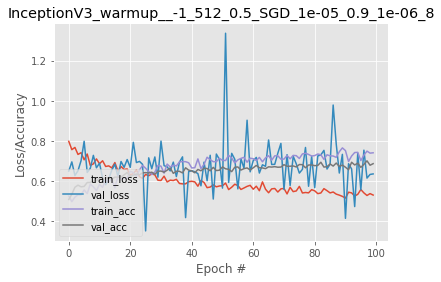

In [33]:
# plot the training loss and accuracy

N = epochs
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
title = "InceptionV3_warmup_" + '_' + str(layer_index) + '_' + str(hidden_units) + '_' + str(dropout_rate) + '_' + opt_name + '_' + str(lr) + '_' + str(momentum) + '_' + str(decay) + '_' + str(batch_size)
plt.title(title)
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig('../evaluation/InceptionV3/plots/' + title + '.png')

In [36]:
# evaluate the network

print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=batch_size)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1)))


[INFO] evaluating network...
              precision    recall  f1-score   support

           0       0.84      0.52      0.64       209
           1       0.61      0.88      0.72       177

    accuracy                           0.68       386
   macro avg       0.72      0.70      0.68       386
weighted avg       0.73      0.68      0.68       386



In [35]:
score = model.evaluate(testX, testY,batch_size=batch_size, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.675020640995836
Test accuracy: 0.6839378476142883


In [37]:
model.save_weights("../models/InceptionV3/InceptionV3_warmed_up_weights_" + title + ".h5")

In [68]:
baseModel2 = InceptionV3(weights=None, include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))

layer_index = -1
headModel2 = baseModel2.layers[layer_index].output
headModel2 = GlobalAveragePooling2D()(headModel2)

# let's add a fully-connected layer
hidden_units = 512
dropout_rate = 0.5

headModel2 = Dense(hidden_units, activation='relu')(headModel2)
headModel = Dropout(dropout_rate)(headModel)
headModel2 = Dense(2, activation="softmax")(headModel2)
 
# place the head FC model on top of the base model (this will become
# the actual model we will train)
model2 = Model(inputs=baseModel2.input, outputs=headModel2)

In [62]:
model2.load_weights("../models/InceptionV3/InceptionV3_warmed_up_weights_InceptionV3_warmup__-1_512_0.5_SGD_1e-05_0.9_1e-06_8.h5")

In [48]:
model2.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv2d_377 (Conv2D)             (None, 111, 111, 32) 864         input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_377 (BatchN (None, 111, 111, 32) 96          conv2d_377[0][0]                 
__________________________________________________________________________________________________
activation_377 (Activation)     (None, 111, 111, 32) 0           batch_normalization_377[0][0]    
____________________________________________________________________________________________

In [63]:
# we chose to train the top 2 inception blocks, i.e. we will freeze
# the first 249 layers and unfreeze the rest:
#fine_tuned_layer_index = -7

#for layer in model2.layers[:fine_tuned_layer_index]:
    #layer.trainable = False
for layer in model2.layers:
    layer.trainable = True

In [50]:
model2.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv2d_377 (Conv2D)             (None, 111, 111, 32) 864         input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_377 (BatchN (None, 111, 111, 32) 96          conv2d_377[0][0]                 
__________________________________________________________________________________________________
activation_377 (Activation)     (None, 111, 111, 32) 0           batch_normalization_377[0][0]    
____________________________________________________________________________________________

In [64]:
# initialize the training data augmentation object

trainAug2 = ImageDataGenerator(
	rotation_range=30,
	zoom_range=0.15,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.15,
	horizontal_flip=True,
	fill_mode="nearest")

# initialize the validation/testing data augmentation object (which
# we'll be adding mean subtraction to)
valAug2 = ImageDataGenerator()

In [65]:
lr = 1e-4
momentum = 0.9
decay=1e-6
opt = SGD(lr=lr, momentum=momentum, decay=decay)

model2.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])
opt_name, _ = str(opt)[18:].split(' ', 1)
print(opt_name)

SGD


In [66]:
epochs = 100
batch_size = 8

# train the head of the network for a few epochs (all other layers
# are frozen) -- this will allow the new FC layers to start to become
# initialized with actual "learned" values versus pure random
print("[INFO] training network...")
H = model2.fit_generator(
	trainAug2.flow(trainX, trainY, batch_size=batch_size),
	steps_per_epoch=len(trainX) // batch_size,
	validation_data=valAug2.flow(testX, testY),
	validation_steps=len(testX) // batch_size,
	epochs=epochs)

[INFO] training head...
Epoch 1/100
144/144 [==============================] - 53s 367ms/step - loss: 0.4994 - accuracy: 0.7713 - val_loss: 0.4674 - val_accuracy: 0.7725
Epoch 2/100
144/144 [==============================] - 43s 297ms/step - loss: 0.4838 - accuracy: 0.7730 - val_loss: 0.5016 - val_accuracy: 0.7994
Epoch 3/100
144/144 [==============================] - 43s 300ms/step - loss: 0.4946 - accuracy: 0.7765 - val_loss: 0.5089 - val_accuracy: 0.8058
Epoch 4/100
144/144 [==============================] - 43s 300ms/step - loss: 0.4839 - accuracy: 0.7809 - val_loss: 0.3719 - val_accuracy: 0.8091
Epoch 5/100
144/144 [==============================] - 44s 304ms/step - loss: 0.4782 - accuracy: 0.7948 - val_loss: 0.4001 - val_accuracy: 0.8107
Epoch 6/100
144/144 [==============================] - 44s 304ms/step - loss: 0.4618 - accuracy: 0.7843 - val_loss: 0.4964 - val_accuracy: 0.8114
Epoch 7/100
144/144 [==============================] - 44s 309ms/step - loss: 0.4771 - accuracy: 0.7

144/144 [==============================] - 43s 302ms/step - loss: 0.3989 - accuracy: 0.8148 - val_loss: 0.5087 - val_accuracy: 0.8520
Epoch 57/100
144/144 [==============================] - 44s 302ms/step - loss: 0.3640 - accuracy: 0.8365 - val_loss: 0.2601 - val_accuracy: 0.8538
Epoch 58/100
144/144 [==============================] - 43s 301ms/step - loss: 0.3458 - accuracy: 0.8339 - val_loss: 0.4843 - val_accuracy: 0.8538
Epoch 59/100
144/144 [==============================] - 39s 268ms/step - loss: 0.3657 - accuracy: 0.8470 - val_loss: 0.2998 - val_accuracy: 0.8617
Epoch 60/100
144/144 [==============================] - 29s 199ms/step - loss: 0.3712 - accuracy: 0.8304 - val_loss: 0.4285 - val_accuracy: 0.8538
Epoch 61/100
144/144 [==============================] - 30s 205ms/step - loss: 0.3594 - accuracy: 0.8446 - val_loss: 0.2793 - val_accuracy: 0.8496
Epoch 62/100
144/144 [==============================] - 30s 206ms/step - loss: 0.3316 - accuracy: 0.8510 - val_loss: 0.3655 - val_a

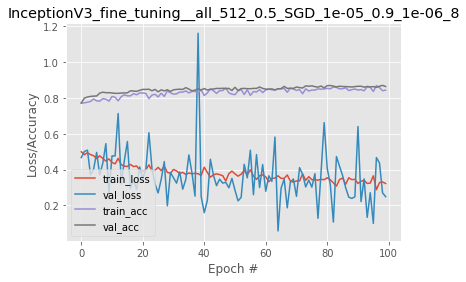

In [67]:
# plot the training loss and accuracy

N = epochs
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
title = "InceptionV3_fine_tuning_" + '_' + 'all' + '_' + str(hidden_units) + '_' + str(dropout_rate) + '_' + opt_name + '_' + str(lr) + '_' + str(momentum) + '_' + str(decay) + '_' + str(batch_size)
plt.title(title)
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
#plt.savefig('../evaluation/InceptionV3/plots/' + title + '.png')


In [0]:
score = model2.evaluate(testX, testY,batch_size=batch_size, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [56]:
# evaluate the network

print("[INFO] evaluating network...")
predictions = model2.predict(testX, batch_size=batch_size)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1)))


[INFO] evaluating network...
              precision    recall  f1-score   support

           0       0.93      0.86      0.89       209
           1       0.84      0.92      0.88       177

    accuracy                           0.89       386
   macro avg       0.89      0.89      0.89       386
weighted avg       0.89      0.89      0.89       386



In [58]:
# save model and architecture to single file
model2.save("../models/InceptionV3/InceptionV3_fine_tuned_model" + title + ".h5")
print("Saved model to disk")

Saved model to disk


In [69]:
model2.save_weights("../models/InceptionV3/InceptionV3_fine_tuned_weights_" + title + ".h5")